In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Загрузка тренировочного и тестового наборов данных
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNIST_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNIST_test.csv')

# Отбор изображений классов 0 и 1
train_data_01 = train_data[train_data['label'].isin([0, 1])]
test_data_01 = test_data[test_data['label'].isin([0, 1])]

# Разделение данных на предикторы (значения пикселей) и метки классов
X_train = train_data_01.iloc[:, 1:]
y_train = train_data_01['label']

X_test = test_data_01.iloc[:, 1:]
y_test = test_data_01['label']

# Применение метода главных компонент
pca = PCA(svd_solver='full')
X_train_pca = pca.fit_transform(X_train)

# Определение минимального количества главных компонент, при котором доля объясненной дисперсии > 0.9
min_value_ev = 0.9
explained_variance = np.cumsum(pca.explained_variance_ratio_)
min_components = np.where(explained_variance > min_value_ev)[0][0] + 1
print("Минимальное количество главных компонент для доли объясненной дисперсии > 0.9:", min_components)

Минимальное количество главных компонент для доли объясненной дисперсии > 0.9: 49


In [3]:
# Применение метода главных компонент с min_components
pca = PCA(svd_solver='full', n_components=min_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Получение координат относительно 1 главной компоненты для 1 изображения в тренировочном наборе данных
first_image_coords = X_train_pca[0, 0]
print("Координата относительно 1 главной компоненты для 1 изображения в тренировочном наборе данных:", first_image_coords)

Координата относительно 1 главной компоненты для 1 изображения в тренировочном наборе данных: 1119.66338805277


In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Обучение модели GradientBoostingClassifier (у меня минуту обучалась)
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.8, random_state=23, max_depth=2)
model.fit(X_train_pca, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test_pca)

# Вычисление и вывод точности модели
cr = classification_report(y_test, y_pred, output_dict=True)
accuracy = cr["accuracy"]
print("Точность модели:", accuracy)

# Матрица ошибок
confusion = confusion_matrix(y_test, y_pred)
tp = confusion[1, 1]
print("TP в матрице ошибок:", tp)

Точность модели: 0.9990543735224586
TP в матрице ошибок: 1134


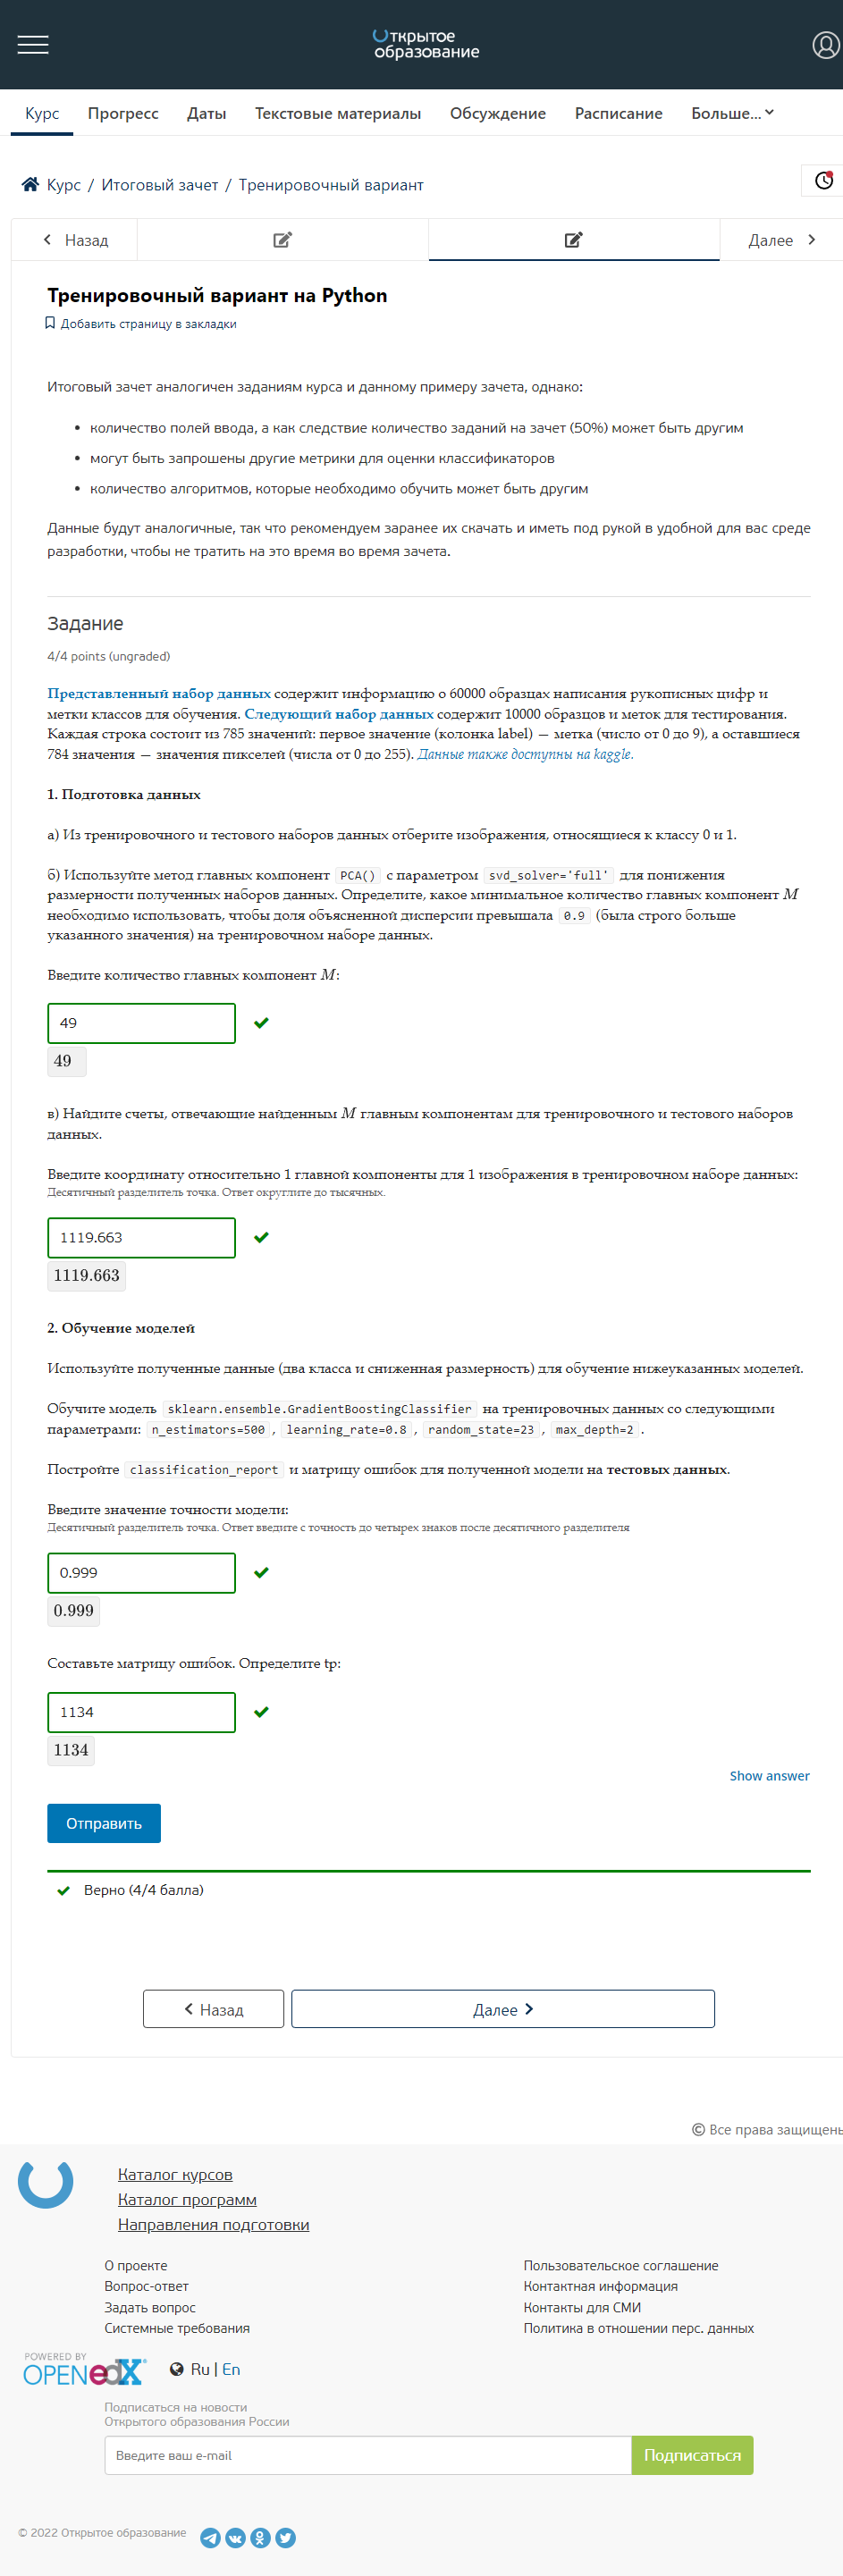